In [26]:
# Install libraries
%pip install seaborn

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

# Set plotting styles
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
# Load the Data
import os

base_dir = os.path.dirname(os.path.abspath("__file__"))  # fallback for Jupyter
csv_path = os.path.join(base_dir, "..", "ultrasound_report_pipeline", "output", "consolidated_patient_visits.csv")

if os.path.exists(csv_path):
    df = pd.read_csv(csv_path)
    print(f"[✓] Loaded data from: {csv_path}")
    df.head()
else:
    raise FileNotFoundError(f"[!] File not found: {csv_path}. Make sure the path is correct.")

[✓] Loaded data from: d:\Projects\ultrasound_db_analysis\notebooks\..\ultrasound_report_pipeline\output\consolidated_patient_visits.csv


In [28]:
# Basic Overview
print("\nShape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nDTypes:\n", df.dtypes)
df.describe(include="all")


Shape: (10, 9)

Columns: ['PatientID', 'FullName', 'Gender', 'DateOfBirth', 'AppointmentDate', 'VisitReason', 'UltrasoundImage', 'UltrasoundReport', 'Reports']

DTypes:
 PatientID             int64
FullName             object
Gender               object
DateOfBirth          object
AppointmentDate      object
VisitReason          object
UltrasoundImage     float64
UltrasoundReport     object
Reports              object
dtype: object


,PatientID,FullName,Gender,DateOfBirth,AppointmentDate,VisitReason,UltrasoundImage,UltrasoundReport,Reports
count,10.00000,10,10,10,10,10,0.0,10,10
unique,NaN,10,2,10,10,10,NaN,9,10
top,NaN,John Doe,Male,1980-05-15,2025-02-20 09:00:00,Routine Check-Up,NaN,Normal results.,[{'ReportText': 'Cholesterol levels are stable...
freq,NaN,1,5,1,1,1,NaN,2,1
mean,5.50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3.02765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,3.25000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,5.50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,7.75000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Missing Values:
 PatientID            0
FullName             0
Gender               0
DateOfBirth          0
AppointmentDate      0
VisitReason          0
UltrasoundImage     10
UltrasoundReport     0
Reports              0
dtype: int64


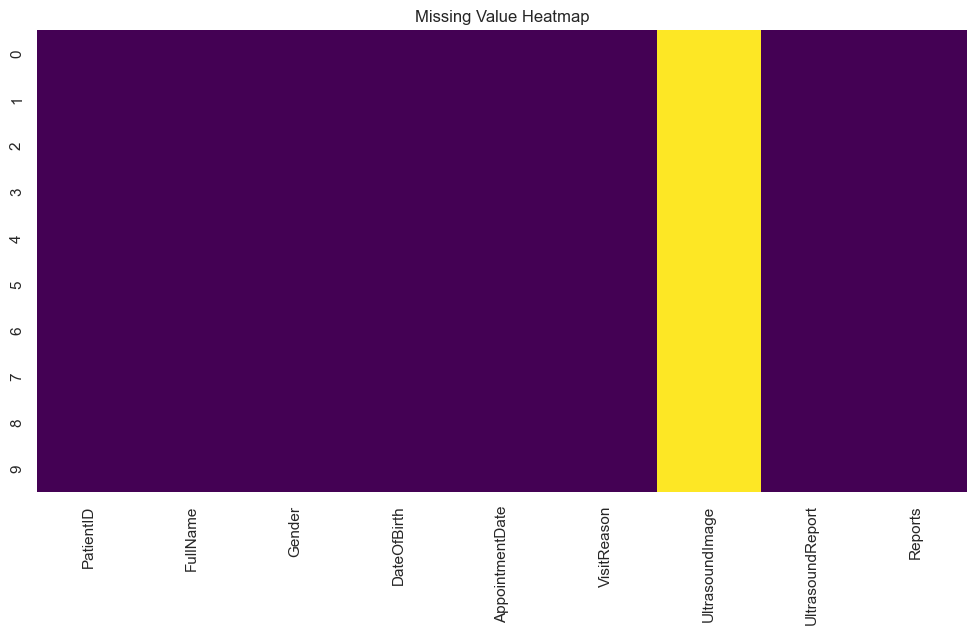

In [29]:
# Null Analysis
null_counts = df.isnull().sum()
print("\nMissing Values:\n", null_counts)
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Value Heatmap")
plt.show()

In [30]:
# Data Cleaning (if needed)

# Ensure datetime types
df["DateOfBirth"] = pd.to_datetime(df["DateOfBirth"])
df["AppointmentDate"] = pd.to_datetime(df["AppointmentDate"])

# Add derived columns
current_year = datetime.now().year
df["PatientAge"] = current_year - df["DateOfBirth"].dt.year

# Skip ReportDate and DaysToReport if column missing
if "ReportDate" in df.columns:
    df["ReportDate"] = pd.to_datetime(df["ReportDate"])
    df["DaysToReport"] = (df["ReportDate"] - df["AppointmentDate"]).dt.days
else:
    print("[i] Skipping ReportDate and DaysToReport — column not in CSV.")

[i] Skipping ReportDate and DaysToReport — column not in CSV.


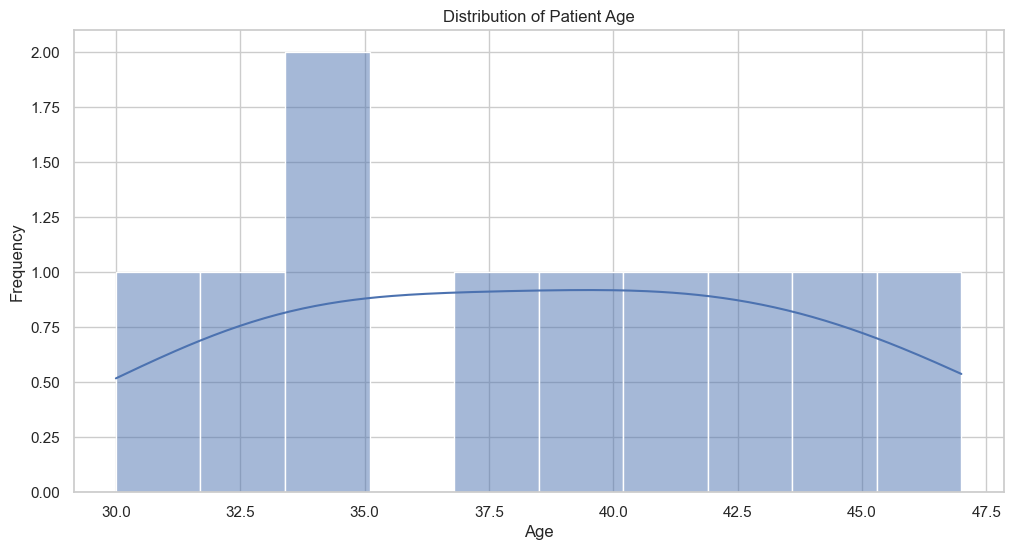

In [31]:
# Distribution of Age
sns.histplot(df["PatientAge"], bins=10, kde=True)
plt.title("Distribution of Patient Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

C:\Users\gunap\AppData\Local\Temp\ipykernel_36392\1528556273.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Gender", palette="Set2")


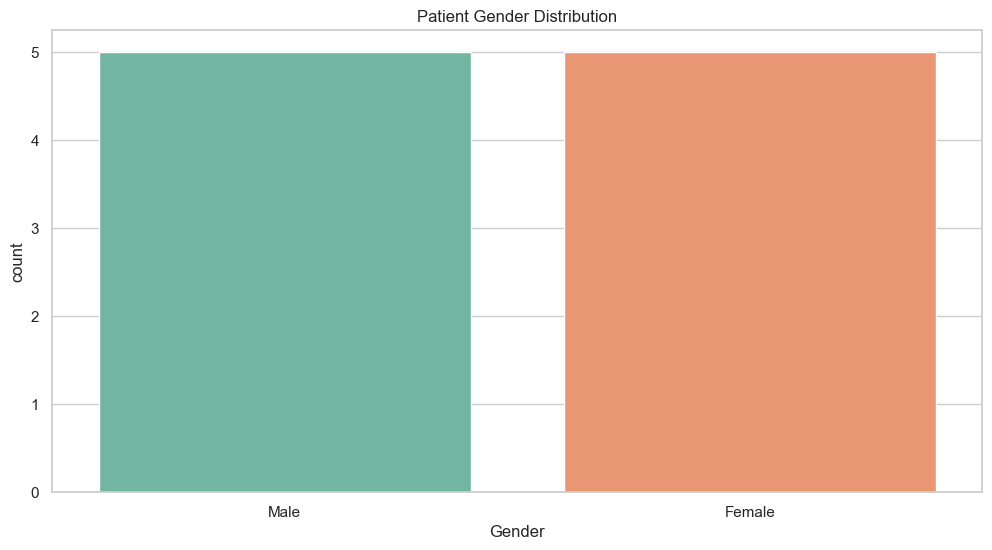

In [32]:
# Gender Breakdown
sns.countplot(data=df, x="Gender", palette="Set2")
plt.title("Patient Gender Distribution")
plt.show()

In [33]:
# Time Between Appointment and Report
if "DaysToReport" in df.columns:
    sns.histplot(df["DaysToReport"], bins=15, kde=True, color="orange")
    plt.title("Days Between Appointment and Report")
    plt.xlabel("Days")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("[i] Skipping plot — 'DaysToReport' not available.")

[i] Skipping plot — 'DaysToReport' not available.


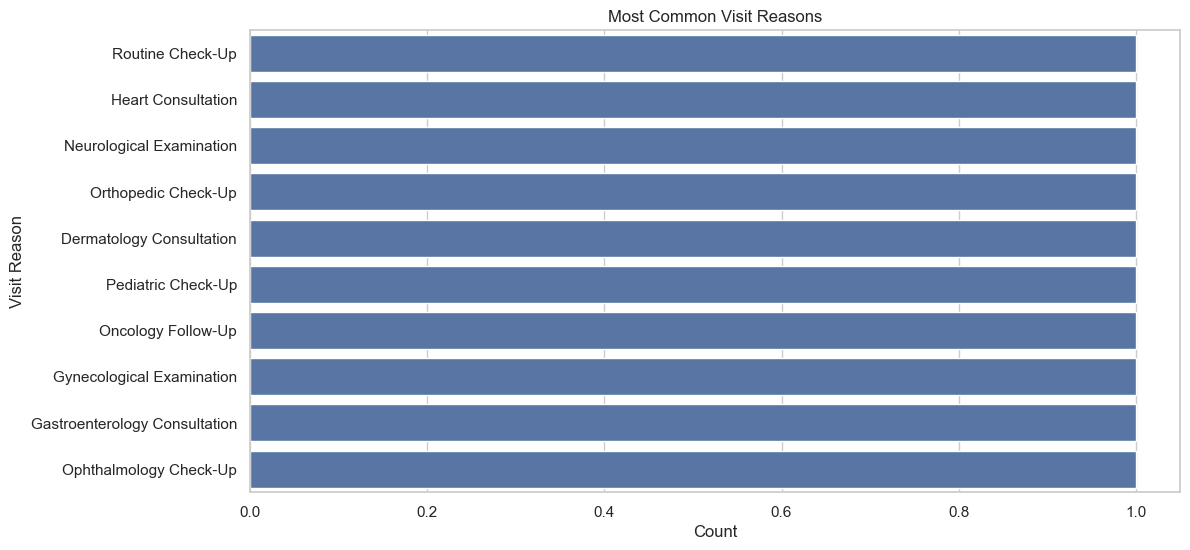

In [34]:
# Visit Reason Frequency
sns.countplot(y="VisitReason", data=df, order=df["VisitReason"].value_counts().index)
plt.title("Most Common Visit Reasons")
plt.xlabel("Count")
plt.ylabel("Visit Reason")
plt.show()

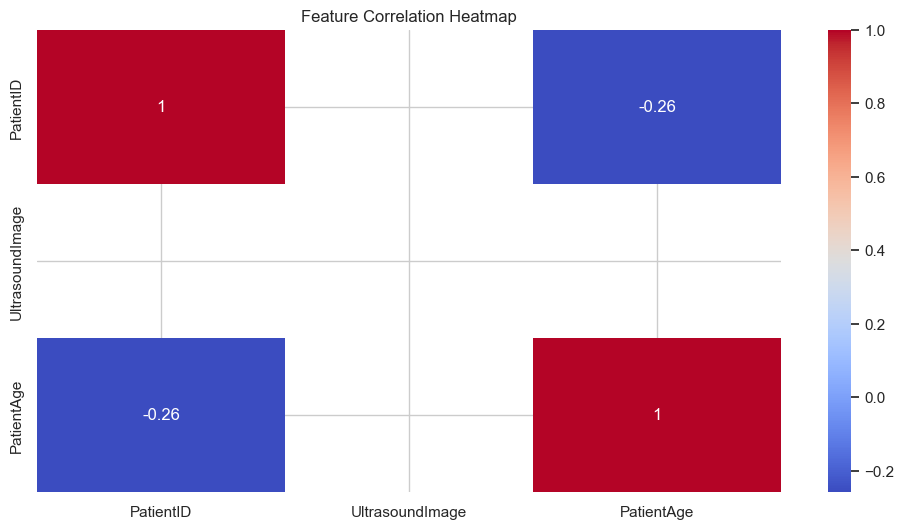

In [35]:
# Correlation Heatmap (numeric only)
numeric_cols = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()